In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC




# Load your dataset
data = pd.read_csv('creditcard.csv')
data.head()

data.isnull().values.any()

data["Amount"].describe()

non_fraud = len(data[data.Class == 0])
fraud = len(data[data.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


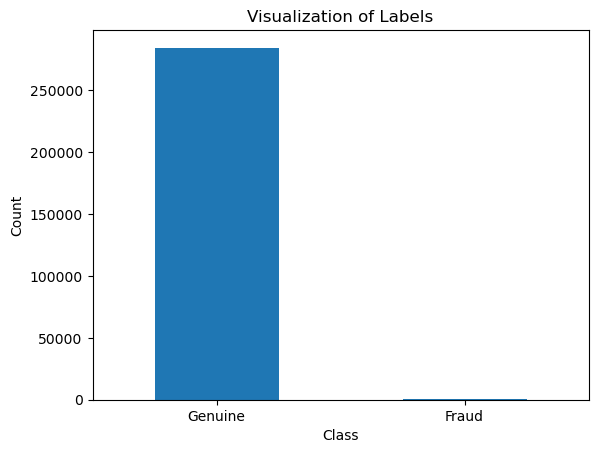

In [60]:
labels = ["Genuine", "Fraud"]
count_classes = data.value_counts(data['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [61]:
scaler = StandardScaler()
data["NormalizedAmount"] = scaler.fit_transform(data["Amount"].values.reshape(-1, 1))
data.drop(["Amount", "Time"], inplace= True, axis= 1)

Y = data["Class"]
X = data.drop(["Class"], axis= 1)

In [62]:
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (199364, 29)
Shape of test_X:  (85443, 29)


In [63]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.90754069964773


In [64]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100
print("Random Forest Score: ", random_forest_score)

Random Forest Score:  99.95201479348805


In [65]:
#SVM 

svm = SVC()
svm.fit(train_X, train_Y)
predictions_svm = svm.predict(test_X)
svm_score = svm.score(test_X, test_Y) * 100
print("SVM Score: ", svm_score)

SVM Score:  99.94616293903537


In [66]:
#Logistic Regression

lr = LogisticRegression()
lr.fit(train_X, train_Y)
predictions_lr = lr.predict(test_X)
lr_score = lr.score(test_X, test_Y) * 100
print("Logistic Regression Score: ", lr_score)

Logistic Regression Score:  99.92977774656788


C:\Users\NIRALI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
#Defining a function for Cross Validation Test

def get_score(model, train_X,train_Y,test_X,test_Y):
    model.fit(train_X,train_Y)
    return model.score(test_X,test_Y)

In [68]:
#Cross Validation - (k-fold)

from sklearn.model_selection import KFold
kf = KFold(n_splits=100)

#Decision Tree
kfdt = get_score(DecisionTreeClassifier(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for Decison Tree Classifier : ",kfdt*100)

#Random Forest
kfrf = get_score(RandomForestClassifier(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for Random Forest Classifier : ",kfrf*100)

#SVM
kfsvm = get_score(SVC(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for SVM : ",kfsvm*100)

#Logistic Regression
kflr = get_score(LogisticRegression(),train_X,train_Y,test_X,test_Y)
print("Score using k-fold cross validation for Logistic Regression : ",kflr*100)

Score using k-fold cross validation for Decison Tree Classifier :  99.91222218320986
Score using k-fold cross validation for Random Forest Classifier :  99.95435553526913
Score using k-fold cross validation for SVM :  99.94616293903537
Score using k-fold cross validation for Logistic Regression :  99.92977774656788


C:\Users\NIRALI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix - Decision Tree
[[85263    47]
 [   32   101]]


<AxesSubplot:>

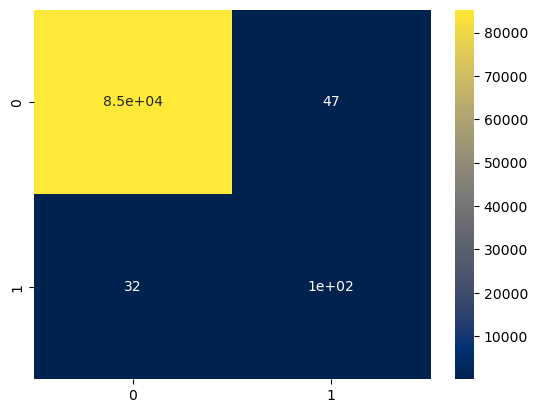

In [69]:
#Confusion Matrix - Decision Tree

confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)
sns.heatmap(confusion_matrix_dt,annot= True, cmap="cividis")

Confusion Matrix - Random Forest
[[85299    11]
 [   30   103]]


<AxesSubplot:>

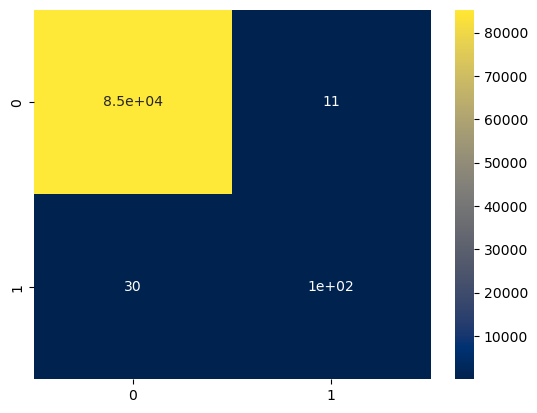

In [70]:
#Confusion Matrix - Random Forest

cm_resampled = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)
sns.heatmap(cm_resampled,annot= True, cmap="cividis")

Confusion Matrix - SVM
[[85296    14]
 [   32   101]]


<AxesSubplot:>

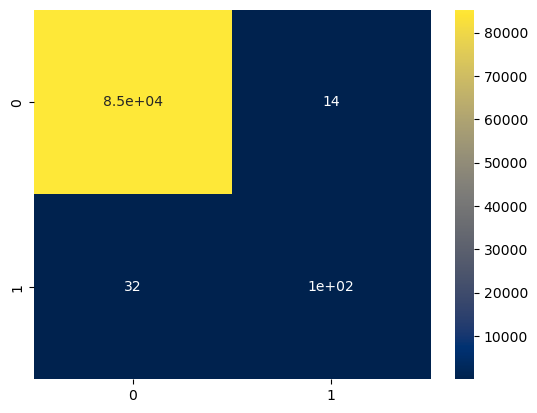

In [71]:
#Confusion Matrix - SVM

confusion_matrix_svm = confusion_matrix(test_Y, predictions_svm.round())
print("Confusion Matrix - SVM")
print(confusion_matrix_svm)
sns.heatmap(confusion_matrix_svm,annot= True, cmap="cividis")

Confusion Matrix - Logistic Regression
[[85300    10]
 [   50    83]]


<AxesSubplot:>

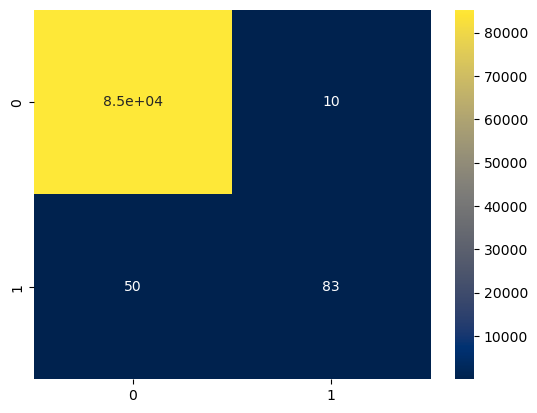

In [73]:
#Confusion Matrix - Logistic Regression

confusion_matrix_lr = confusion_matrix(test_Y, predictions_lr.round())
print("Confusion Matrix - Logistic Regression")
print(confusion_matrix_lr)
sns.heatmap(confusion_matrix_lr ,annot= True, cmap="cividis")